<a href="https://colab.research.google.com/github/YoshiakiAsahara/webpython/blob/main/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

欠損地処理

In [ ]:
df=pd.DataFrame(
    {
        'A':[1,np.nan,3,4,5],
        'B':[6,7,8,np.nan,10],
        'C':[11,12,13,14,15]
    }
)
df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [ ]:
#欠損値かどうか
print(df.isnull())
Z=df.isnull
#欠損地を補完
A=df.fillna(0)
print(A)
B=df.fillna(method='ffill')
print(B)
C=df.fillna(df.mean())
print(C)

       A      B      C
0  False  False  False
1   True  False  False
2  False  False  False
3  False   True  False
4  False  False  False
     A     B   C
0  1.0   6.0  11
1  0.0   7.0  12
2  3.0   8.0  13
3  4.0   0.0  14
4  5.0  10.0  15
     A     B   C
0  1.0   6.0  11
1  1.0   7.0  12
2  3.0   8.0  13
3  4.0   8.0  14
4  5.0  10.0  15
      A      B   C
0  1.00   6.00  11
1  3.25   7.00  12
2  3.00   8.00  13
3  4.00   7.75  14
4  5.00  10.00  15


特徴量の正規化

In [ ]:
df=pd.DataFrame(
    {
        'A':[1,2,3,4,5],
        'B':[100,200,400,500,800]
    }
)
df

,A,B
0,1,100
1,2,200
2,3,400
3,4,500
4,5,800


In [ ]:
from sklearn.preprocessing import StandardScaler
#分散正規化のインスタンスを作成
stdsc = StandardScaler()
#分散正規化を実行
stdsc.fit(df)
stdsc.transform(df)
#numpy配列が得られる
# NumPy配列をDataFrameに変換
pddf = pd.DataFrame.from_records(df)
print(pddf)
npdf = pddf.values
print(npdf)

   A    B
0  1  100
1  2  200
2  3  400
3  4  500
4  5  800
[[  1 100]
 [  2 200]
 [  3 400]
 [  4 500]
 [  5 800]]


分散正規化

In [ ]:
df=pd.DataFrame(
    {
        'A':[1,2,3,4,5],
        'B':[100,200,400,500,800]
    }
)
df

,A,B
0,1,100
1,2,200
2,3,400
3,4,500
4,5,800


In [ ]:
from sklearn.preprocessing import MinMaxScaler
stdc = MinMaxScaler()
#最小最大正規化
mmsc =MinMaxScaler()
mmsc.fit(df)
mmsc.transform(df)

NameError: name 'df' is not defined

サポートベクタマシン

In [ ]:
from sklearn.datasets import load_iris
#irisデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target
# 先頭5行を表示
print('X:')
print(X[:5, :])
print('y:')
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split
#説明変数　目的変数　学習データとテストデータ
x_train, x_test, y_train, y_test =train_test_split(X, y , test_size=0.3, random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


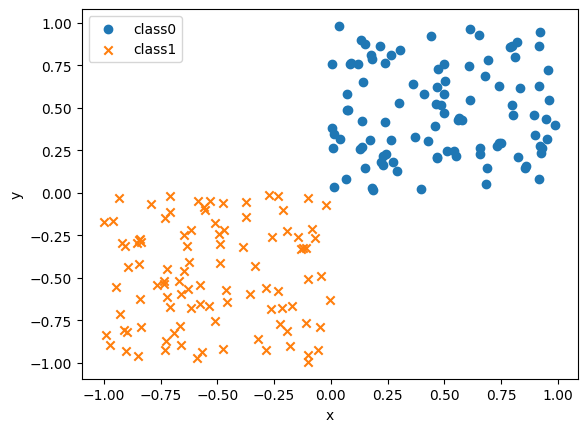

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#乱数シードを固定
rng = np.random.default_rng(123)
#x軸y軸ともに0から1までの一様分布から100点をサンプリング
X0 = rng.uniform(size=(100, 2))
#クラス0のラベルを100個生成
y0 = np.repeat(0,100)
#x軸y軸ともに-1から0までの一様分布から100点をサンプリング
X1 = rng.uniform(-1.0, 0.0, size=(100, 2))
#クラス1のラベルを100個生成
y1 = np.repeat(1,100)
#散布図にプロット
fig, ax = plt.subplots()
ax.scatter(X0[:, 0], X0[:, 1]
           , marker='o', label='class0')
ax.scatter(X1[:, 0], X1[:, 1],
           marker='x', label='class1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC
#学習, および決定境界, マージン, サポートベクタを可視化する関数
def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1 ):
  #サポートベクタマシンのインスタンス化
  svc = SVC(kernel=kernel, C=C)
  #学習
  svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))

  fig, ax = plt.subplots()
  ax.scatter(X0[:, 0],X0[:, 1],
             marker='o', label='class0')
  ax.scatter(X1[:, 0],X1[:, 1],
             marker='x', label='class1')
  xx, yy =np.meshgrid(np.linspace(xmin, xmax, 100),
                      np.linspace(ymin, ymax, 100))
  xy = np.vstack([xx.ravel(), yy.ravel()]).T
  p = svc.decision_function(xy).reshape((100,100))
  ax.contour(xx, yy, p,
             colors='k', levels=[-1, 0, 1],
             alpha=0.5, linstyles=['--', '-', '--'])
  #サポートベクタをプロット
  ax.scatter(svc.support_vectors_[:, 0],
             svc.support_vectors_[:, 1],
             s=250, facecolors='none',
             edgecolors='black')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.legend(loc='best')
  plt.show()

<ipython-input-17-5573c574900d>:18: UserWarning: The following kwargs were not used by contour: 'linstyles'
  ax.contour(xx, yy, p,


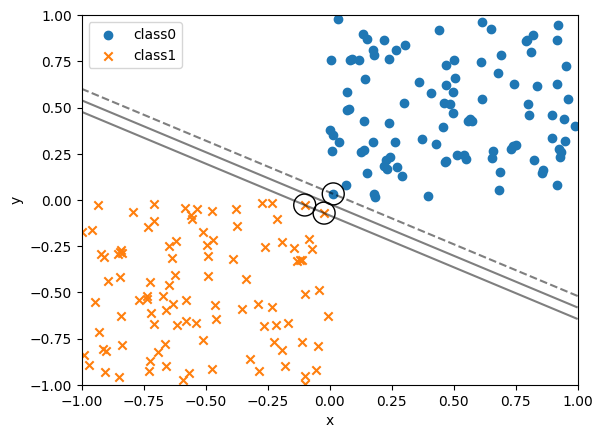

In [ ]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='linear', C=1e6)

<ipython-input-17-5573c574900d>:18: UserWarning: The following kwargs were not used by contour: 'linstyles'
  ax.contour(xx, yy, p,


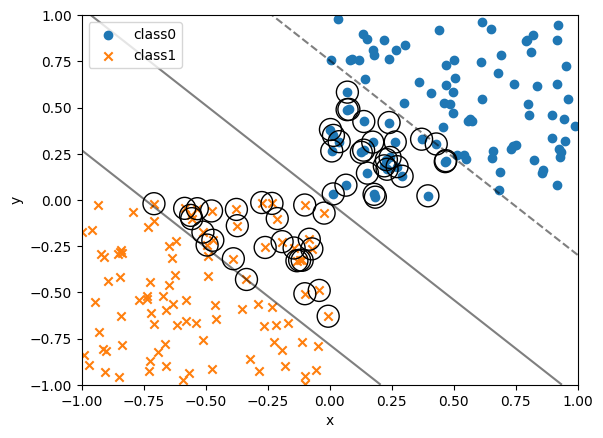

In [ ]:
plot_boundary_margin_sv(X0, y0, X1, y1,
                        kernel='linear',C=0.1)

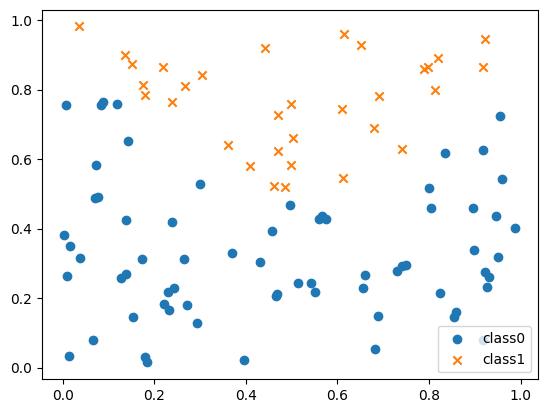

In [ ]:
rng = np. random.default_rng(123)
X =rng.random(size=(100,2))
y = (X[:, 1] > 2*(X[:, 0]-0.5)**2 +0.5).astype(int)
fig, ax =plt.subplots()
ax.scatter(X[y == 0, 0],X[y == 0, 1],
           marker='o', label='class0')
ax.scatter(X[y == 1, 0],X[y == 1, 1],
           marker='x',label='class1')
ax.legend()
plt.show()

<ipython-input-17-5573c574900d>:18: UserWarning: The following kwargs were not used by contour: 'linstyles'
  ax.contour(xx, yy, p,


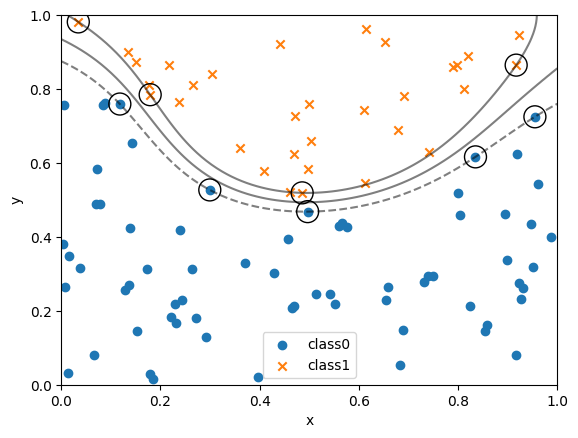

In [ ]:
#決定係数、マージン、　サポートベクタをプロット
X0, X1 =X[y == 0, :], X[y == 1, :]
y0, y1 =y[y == 0], y[y == 1]
plot_boundary_margin_sv(X0, y0, X1, y1,
                        kernel='rbf', C=1e3, xmin=0, ymin=0)

サポートベクタマシンは外れ値の影響を受けやすいため、標準正規化するのが望ましい。

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#Irisデータセットを読み込む
iris = load_iris()
x, y = iris.data, iris.target
#学習データとテストデータに分割する
X_train, X_test, y_train, y_test =train_test_split(
                  X, y, test_size=0.3, random_state=123)
#決定木をインスタンス化木の深さ=3
tree = DecisionTreeClassifier(max_depth=3,
                              random_state=123)
#学習
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
#dot形式のデータを抽出
dot_data = export_graphviz(tree, filled=True,
                            rounded=True,
                            class_names=['Setosa',
                                         'Versicolor',
                                         'Virginica'],
                            feature_names=['Sepal Length',
                                           'Sepal Width',
                                           'Petal Length',
                                           'Petal Width'],
                            out_file=None)
#決定木のプロットを出力
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [ ]:
#予測
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

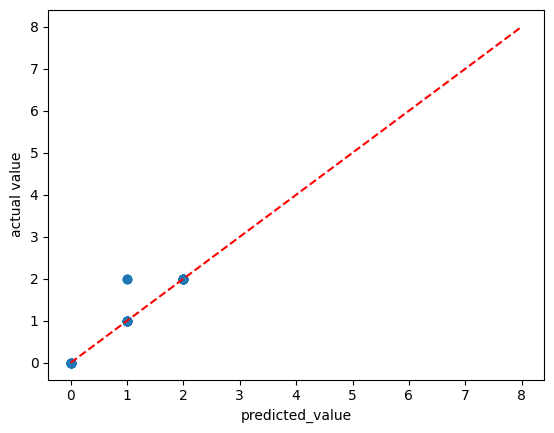

In [ ]:
import matplotlib.pyplot as plt
#横軸を予測値、縦軸を実績値とする散布図をプロットする
fig, ax =plt. subplots()
ax.scatter(y_pred, y_test)
ax.plot((0, 8), (0, 8),
        linestyle='dashed', color='red')
ax.set_xlabel('predicted_value')
ax.set_ylabel('actual value')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#ランダムフォレストをインスタンス化する
forest = RandomForestClassifier(n_estimators=100,
                                random_state=123)
#学習
forest.fit(X_train, y_train)
#予測
y_pred = forest.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
#Clifolnia housing dataset recall
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

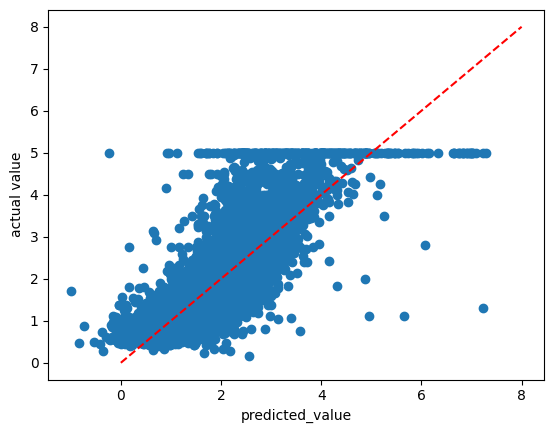

In [ ]:
import matplotlib.pyplot as plt
#横軸を予測値、縦軸を実績値とする散布図をプロットする
fig, ax =plt. subplots()
ax.scatter(y_pred, y_test)
ax.plot((0, 8), (0, 8),
        linestyle='dashed', color='red')
ax.set_xlabel('predicted_value')
ax.set_ylabel('actual value')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

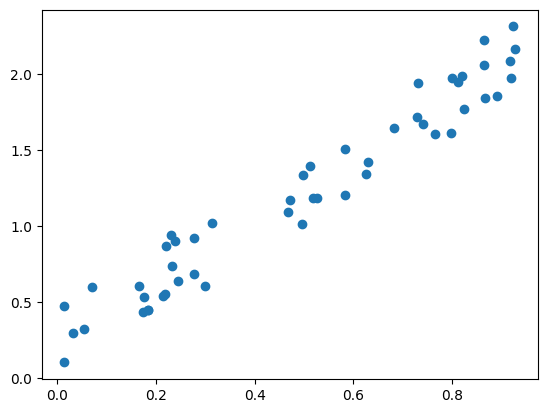

In [ ]:
#固定シード
rng =np.random.default_rng(123)
#0以上位1未満の一様乱数を50個生成
X = rng.uniform(size=50)
#xを2倍した後に0以上1未満の一様乱数を0.5倍して足し合わせる
Y = 2*X + 0.5*rng.uniform(size=50)
#xを二倍した後に、0以上1未満の」一様乱数を0.5倍して足し合わせる
Y = 2*X + 0.5*rng.uniform(size=50)
#散布図をプロット
fig, ax = plt.subplots()
ax.scatter(X, Y)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
# 主成分のクラスをインスタンス化
pca = PCA(n_components=2)
#主成分分析を実行　pcaに変換する前にhstackメソッドで結合-1は適切な計算をしてくれる命令
X_pca = pca.fit_transform(np.hstack(((X.reshape(-1, 1)),
                                    Y. reshape(-1, 1))))

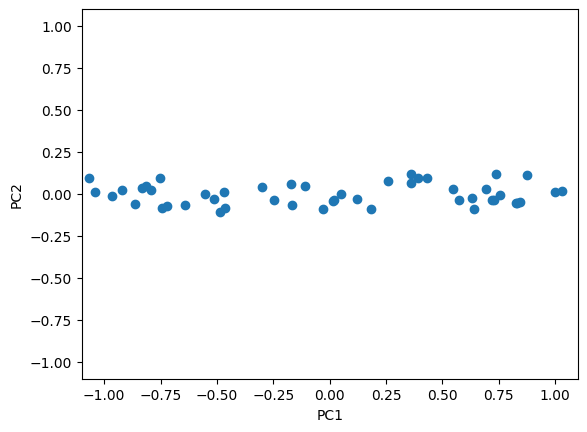

In [ ]:
#主成分分析で得られた座標を散布図にプロット
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1])
ax.set_xlabel('PC1')#主成分を取り出す
ax.set_ylabel('PC2')
ax.set_xlim(-1.1, 1.1)#表示範囲を指定
ax.set_ylim(-1.1, 1.1)
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
#iris データセットを読み込む
iris = load_iris()
X, y=iris.data[:100, :], iris.target[:100]
X_train, X_test, y_train, y_test =train_test_split(
    X, y, test_size=0.3, random_state=123)
#svcのインスタンス化
svc = SVC()
#SVCで学習
svc.fit(X_train, y_train)
#テストデータセットの予測
y_pred = svc.predict(X_test)

In [ ]:
#適合率、再現率、F値を導出
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
#サポートベクタマシンをインスタンス化
svc = SVC()
#10分割交差検証を実行
cross_val_score(svc, X, y, cv=10, scoring='precision')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

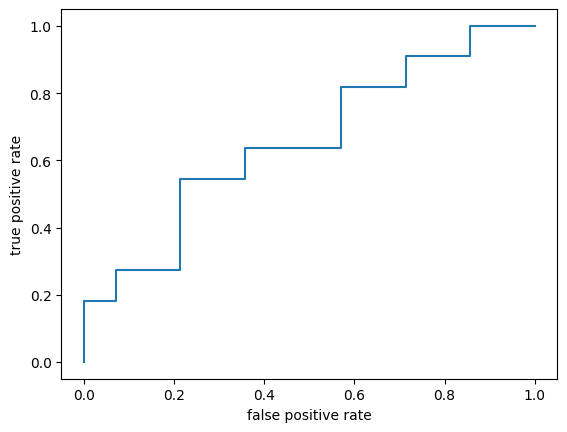

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#擬陽性率と親陽性率を算出
fpr = np.array([0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 4, 5, 5, 6, 7, 8, 8, 8, 9, 10, 10, 11,
               12, 12, 13, 14])/14
tpr = np.array([0, 1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7, 7, 7,
                8, 9, 9, 9, 10, 10, 10, 11, 11, 11])/11
#ROC曲線をプロット
fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
#各ユーザが退会したかどうかを表すラベル
labels = np.array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])
#各ユーザの予測退会確率
probs = np.array([0.98, 0.95, 0.9, 0.87, 0.85, 0.8, 0.75, 0.71, 0.63, 0.55,
                  0.51, 0.47, 0.43, 0.38, 0.35,
                  0.31, 0.28, 0.24, 0.22, 0.19,
                  0.15, 0.12, 0.08, 0.04, 0.01])
#擬陽性　信陽性　しきい値を算出
fpr, tpr, threshold = roc_curve(labels, probs)
print('偽陽性率:' , fpr)
print('信陽性率:', tpr)

偽陽性率: [0.         0.         0.         0.07142857 0.07142857 0.21428571
 0.21428571 0.35714286 0.35714286 0.57142857 0.57142857 0.71428571
 0.71428571 0.85714286 0.85714286 1.        ]
信陽性率: [0.         0.09090909 0.18181818 0.18181818 0.27272727 0.27272727
 0.54545455 0.54545455 0.63636364 0.63636364 0.81818182 0.81818182
 0.90909091 0.90909091 1.         1.        ]


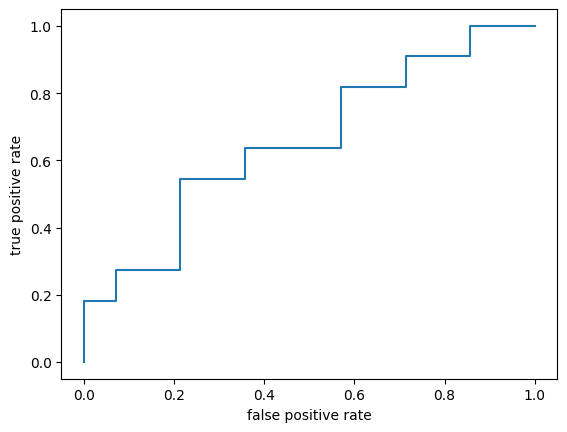

In [ ]:
#ROC曲線をプロット
fig, ax =plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
#AUCを算出
roc_auc_score(labels, probs)

0.6558441558441558

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier
#Irisデータセットをロード
iris = load_iris()
X, y = iris.data, iris.target
#学習データとテストデータに分類
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
#決定木をインスタンス化
clf = DecisionTreeClassifier(random_state=123)
param_grid = {'max_depth': [3,4,5]}
#10分割の交差検証
cv = GridSearchCV(clf, param_grid=param_grid, cv=10)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [3, 4, 5]})

In [ ]:
cv.best_params_

{'max_depth': 3}

In [ ]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=123)

In [ ]:
y_pred = cv.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [ ]:
from sklearn.datasets import load_iris
#Irisデータセットを読み込む
iris = load_iris()
data = iris.data
#1,3列目を抽出
X=data[:100,[0, 2]]

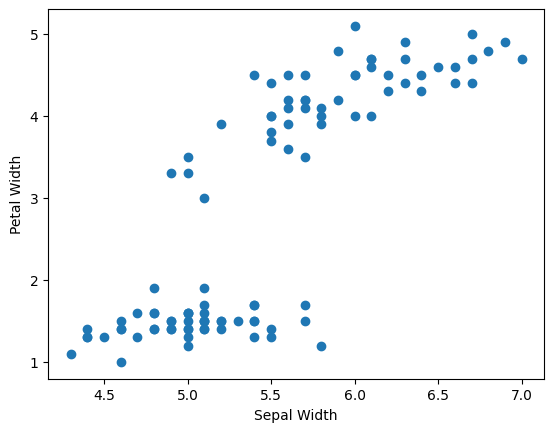

In [ ]:
import matplotlib.pyplot as plt
#散布図を描画
fig, ax =plt.subplots()
ax.scatter(X[:,0],X[:, 1])
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
#クラスタ数を3とするKMeansのインスタンスを生成
km = KMeans(n_clusters=3, init='k-means++', n_init=10,
            random_state=123)
#KMeansを実行
y_km = km.fit_predict(X)

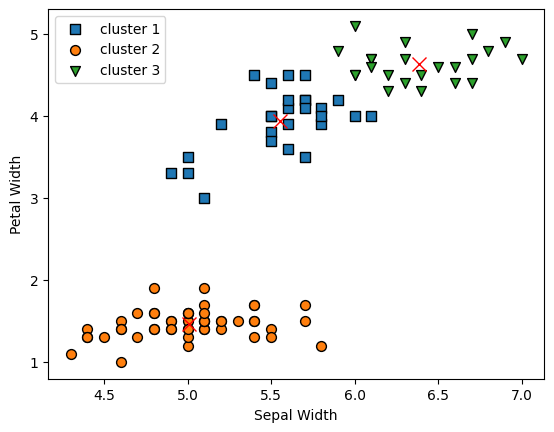

In [ ]:
import numpy as np
fig, ax =plt.subplots()
#散布図（クラスタ1）
ax.scatter(X[y_km == 0, 0], X[y_km == 0,1], s=50,
           edgecolor='black', marker='s', label='cluster 1')
#クラスタ中心（クラスタ1）
ax.plot(np.mean(X[y_km == 0, 0]),
        np.mean(X[y_km ==0, 1]),
        marker='x', markersize=10, color='red')
#散布図（クラス2）
ax.scatter(X[y_km ==1, 0], X[y_km == 1,1], s=50,
           edgecolor='black', marker='o',label='cluster 2')
#クラスタ中心（クラスタ2）
ax.plot(np.mean(X[y_km == 1, 0]),
        np.mean(X[y_km ==1, 1]),
        marker='x', markersize=10, color='red')
#散布図（クラス3）
ax.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50,
           edgecolor='black', marker='v', label='cluster 3' )
#クラスタ中心（クラス3）
ax.plot(np.mean(X[y_km == 2, 0]),
        np.mean(X[y_km == 2, 1]),
        marker='x', markersize=10, color='red')
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
ax.legend()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
#凝集型の階層的クラスタリングのインスタンスを生成
ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean', linkage='complete')
#クラスタリングを実行し、各クラスのクラスタ番号を取得
labels = ac.fit_predict(X)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0])

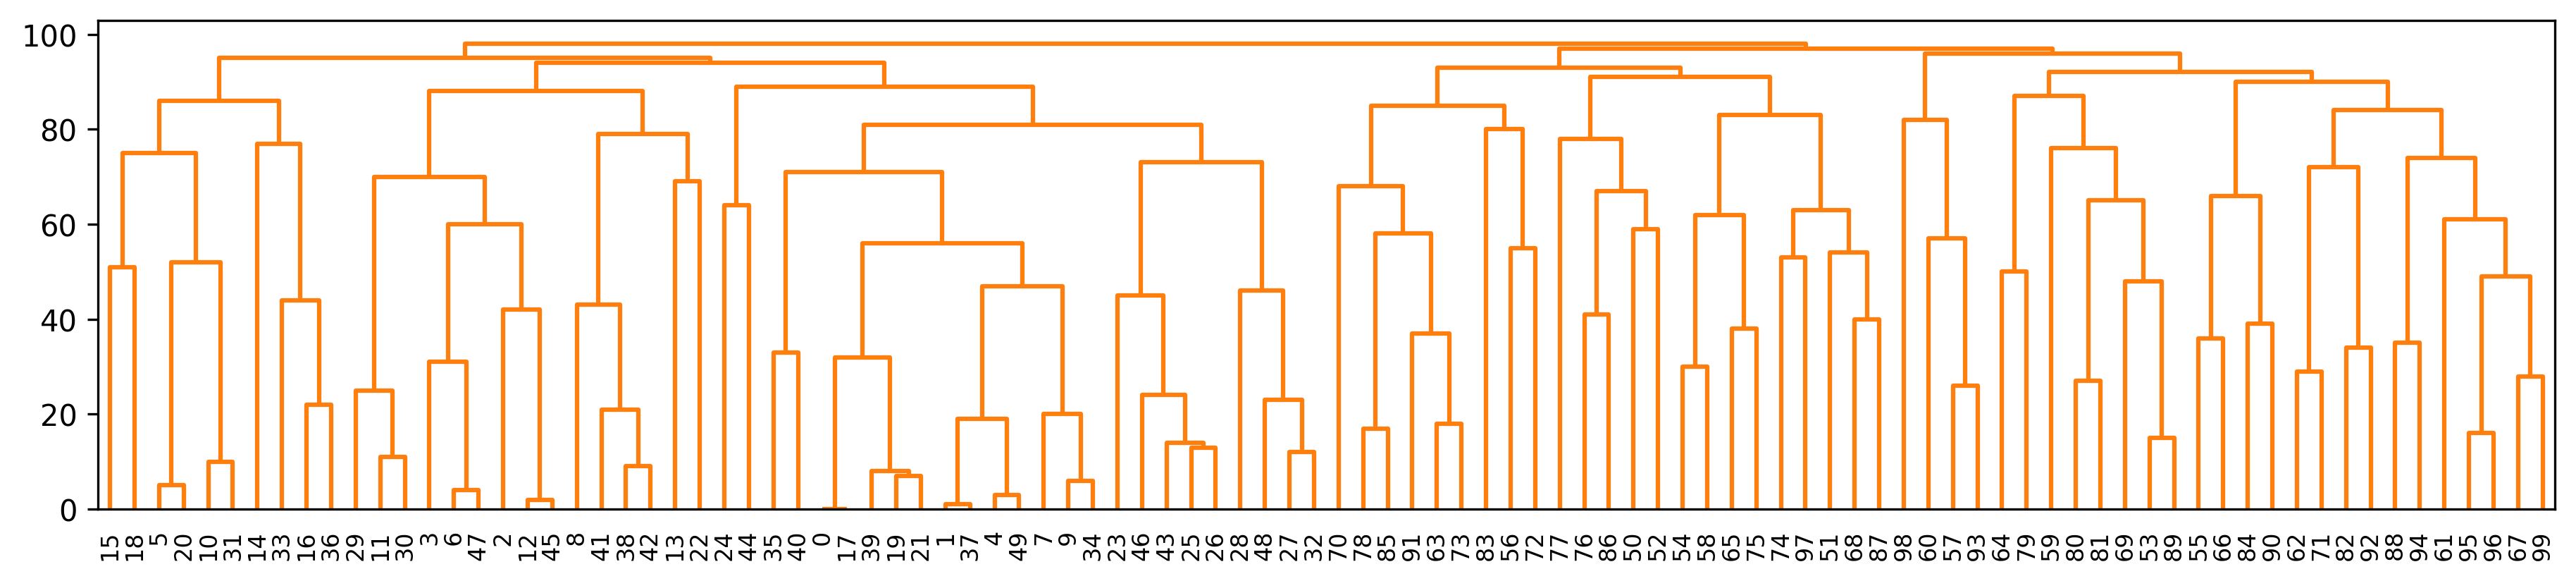

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
#子クラスタとの関係を抽出
children = ac.children_
#クラスタ間の距離を抽出
distance = np.arange(children.shape[0])
#各データの観測番号
no_of_observertions = np.arange(2, children.shape[0]+2)
#子クラスタ、クラスタ間の距離、観測番号を列方向に結合
linkage_matrix = np.hstack((children,
                            distance.reshape(-1,1),
                            no_of_observertions.reshape(-1, 1))).astype(float)
fig, ax=plt.subplots(figsize=(15, 3), dpi=300)
dendrogram(linkage_matrix, labels=np.arange(100),
           leaf_font_size=8, color_threshold=np.inf)
plt.show()